# PA005: High Value Customer Identification 

# 0.0. Planejamento da Solução (IOT) 

### Input - Entrada  

#### 1. Problema do negócio:
       -Selecionar os clientes mais valiosos para integrar um programa de fidelidade
#### 2. Conjunto de dados:
       -Vendas de um e-commerce online durante um ano

### Output - Saída 

1. A indicação das pessoas que farão parte do programa Insiders
    -Lista: client_id | is_insiders
        10323 | yes/1
        10654 | no/2
2. Relatório com as repostas das perguntas de negócio
        1 - Quem são as pessoas elegíveis para participar do programa de Insiders ?
        2 - Quantos clientes farão parte do grupo?
        3 - Quais as principais características desses clientes ?
        4 - Qual a porcentagem de contribuição do faturamento, vinda do Insiders ?
        5 - Qual a expectativa de faturamento desse grupo para os próximos meses ?
        6 - Quais as condições para uma pessoa ser elegível ao Insiders ?
        7 - Quais as condições para uma pessoa ser removida do Insiders ?
        8 - Qual a garantia que o programa Insiders é melhor que o restante da base ?
        9 - Quais ações o time de marketing pode realizar para aumentar o faturamento?

### Task - Tarefas 

1. Quem são as pessoas elegíveis para participar do programa de Insiders?
   - O que é ser elegível? O que são clientes de maior "valor"? 
   - Faturamento:
       - Alto ticket médio
       - Alto LTV
       - Baixo Recência
       - Alto Basket Size
       - Baixa Probabilidade de Churn
       - Alta Previsão LTV
       - Alta Propensão de Compras 
       
                
    - Custo:
       - Baixa taixa de devolução   
       
    - Experiência de compra:
       - Média alta das avaliações 
       
              
2. Quantos clientes farão parte do grupo?
     - Número total de tickets
     - % do grupo Insiders
          
3. Quais as principais características desses clientes? 
     - Escrever características do cliente:
       - Idade
       - Localização
     - Escrever características do consumo:
       - Atributos de Clusterização
    
4. Qual a porcentagem de contribuição do faturamento, vinda do Insiders?
     - Faturamento total do ano
     - Faturamento do grupo Insiders
     
5. Qual a expectativa de faturamento desse grupo para os próximos meses?
      - LTV do grupo Insiders
      - Análise de Cohort

6. Quais as condições para uma pessoa ser elegível ao Insiders?
      - Definir a periodicidade (1 mês, 3 meses)
      - A pessoa ser similar ou parecido com uma pessoa do grupo
      
7. Quais as condições para uma pessoa ser removida do Insiders?
      - Definir a periodicidade (1 mês, 3 meses)
      - A pessoa ser dissimilar ou não-parecido com uma pessoa do grupo
      
8. Qual a garantia que o programa Insiders é melhor que o restante da base?
      - Teste A/B
      - Teste A/B Bayesiano
      - Teste de Hipóteses
      

9. Quais ações o time de marketing pode realizar para aumentar o faturamento?
      - Desconto
      - Preferência de compra
      - Frete
      - Visita a empresa
     

# <font color=red> 0.0. Imports <font/>

In [62]:
import pandas     as pd
import numpy      as np
import seaborn    as sns
import sklearn
import umap.umap_ as umap

from sklearn             import preprocessing as pp
from sklearn             import cluster  as c
from sklearn             import metrics  as m
from plotly              import express  as px
from matplotlib          import pyplot   as plt
from plotly              import express  as px
from IPython.display     import HTML
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer


## 0.1. Helper Functions 

In [2]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    plt.style.use('ggplot')
    plt.rcParams['figure.figsize'] = [24,9]
    plt.rcParams['font.size'] = 24
                     
    display(HTML('<style>.container {widht:100% !important;}</style>'))
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option('display.expand_frame_repr', False)
                     
    sns.set()
jupyter_settings()
                                      
                                     
                     
                     
                     
                     

Populating the interactive namespace from numpy and matplotlib


## 0.2. Load Dataset 

In [3]:
df_raw = pd.read_csv('C:/Users/Michelle/repos/pa005_insiders_clustering/pa005_insiders_clustering/insiders_clustering/data/raw/Ecommerce.csv')

#drop columns NaN
df_raw = df_raw.drop(columns=['Unnamed: 8'], axis=1)
df_raw.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom


# <font color=red> 1.0. Descrição dos Dados <font/>

## 1.1. Rename Columns

In [4]:
df1 = df_raw.copy()

In [5]:
df1.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [6]:
cols_new = ['invoice_no','stock_code','description', 'quantity', 'invoice_date', 'unit_price', 'customer_id', 'country']
df1.columns=cols_new
df1.columns

Index(['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date',
       'unit_price', 'customer_id', 'country'],
      dtype='object')

In [68]:
df1.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,17850,United Kingdom


## 1.2. Data Dimensions

In [8]:
print('Number of rows: {}'.format(df1.shape[0]))
print('Number of cols: {}'.format(df1.shape[1]))

Number of rows: 541909
Number of cols: 8


## 1.3. Data Types

In [9]:
df1.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

## 1.4. Check NA

In [10]:
df1.isna().sum()

invoice_no           0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     135080
country              0
dtype: int64

## 1.5. Replace NA

In [11]:
df1=df1.dropna(subset = ['description', 'customer_id'])
print('Removed data: {:.2f}'.format(1 - ( df1.shape[0] / df_raw.shape[0] )))


Removed data: 0.25


In [12]:
df1.isna().sum()

invoice_no      0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
customer_id     0
country         0
dtype: int64

## 1.6. Change dtypes

In [13]:
#invoice date
df1['invoice_date'] = pd.to_datetime(df1['invoice_date'], format='%d-%b-%y')

#customer id
df1['customer_id'] = df1['customer_id'].astype(int64)
df1.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,17850,United Kingdom


In [14]:
df1.dtypes

invoice_no              object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
customer_id              int64
country                 object
dtype: object

## 1.7. Descriptive Statistics

In [15]:
num_attributes = df1.select_dtypes( include=['int64', 'float64'] )
cat_attributes = df1.select_dtypes( exclude=['int64', 'float64', 'datetime64[ns]'] )

### 1.7.1. Descriptive Statistics

In [16]:
# central tendency - mean, median
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T
             
# dispersion - desvio padrão, minimo, maximo, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( np.min ) ).T
d3 = pd.DataFrame( num_attributes.apply( np.max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

# concatenate
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'mediana', 'std', 'skew', 'kurtosis']
m

,attributes,min,max,range,mean,mediana,std,skew,kurtosis
0,quantity,-80995.0,80995.0,161990.0,12.061303,5.00,248.693064,0.182663,94317.563673
1,unit_price,0.0,38970.0,38970.0,3.460471,1.95,69.315077,452.219019,246924.542988
2,customer_id,12346.0,18287.0,5941.0,15287.690570,15152.00,1713.598197,0.029835,-1.179982


#### 1.7.1.1. Numerical Attributs - Investigating

1 - Quantidade negativa (pode ser devolução)

2 - Preço unitário igual a zero (pode ser promoção?)

### 1.7.2. Categorical Attributs

### Invoice No

In [17]:
# problema: Temos invoice com letras e numeros
#df1['invoice_no'].astype( int )

# invoice_no: 
len(cat_attributes.loc[cat_attributes['invoice_no'].apply( lambda x: bool( re.search( '[^0-9]+', x ) ) ),'invoice_no' ].drop_duplicates())


3654

### Stock Code

In [18]:
#stock_code
df1.loc[df1['stock_code'].apply( lambda x: bool( re.search( '^[a-zA-Z]+$', x ) ) ), 'stock_code'].unique()

array(['POST', 'D', 'M', 'PADS', 'DOT', 'CRUK'], dtype=object)

In [19]:
len(df1.loc[df1['stock_code'].apply( lambda x: bool( re.search( '^[a-zA-Z]+$', x ) ) ), 'stock_code'])

1774

In [20]:
df1.loc[cat_attributes['stock_code'].apply(lambda x: bool(re.search( '^[a-zA-Z]+$', x ))),:].head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
45,536370,POST,POSTAGE,3,2016-11-29,18.00,12583,France
141,C536379,D,Discount,-1,2016-11-29,27.50,14527,United Kingdom
386,536403,POST,POSTAGE,1,2016-11-29,15.00,12791,Netherlands
1123,536527,POST,POSTAGE,1,2016-11-29,18.00,12662,Germany
2239,536569,M,Manual,1,2016-11-29,1.25,16274,United Kingdom


### Description

In [21]:
df1.head()

# Acão: Delete description

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,17850,United Kingdom


### Country

In [22]:
df1['country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada',
       'Unspecified', 'Brazil', 'USA', 'European Community', 'Bahrain',
       'Malta', 'RSA'], dtype=object)

In [23]:
df1['country'].value_counts( normalize=True )

United Kingdom          0.889509
Germany                 0.023339
France                  0.020871
EIRE                    0.018398
Spain                   0.006226
Netherlands             0.005828
Belgium                 0.005086
Switzerland             0.004614
Portugal                0.003638
Australia               0.003095
Norway                  0.002669
Italy                   0.001974
Channel Islands         0.001863
Finland                 0.001708
Cyprus                  0.001529
Sweden                  0.001136
Austria                 0.000986
Denmark                 0.000956
Japan                   0.000880
Poland                  0.000838
USA                     0.000715
Israel                  0.000615
Unspecified             0.000600
Singapore               0.000563
Iceland                 0.000447
Canada                  0.000371
Greece                  0.000359
Malta                   0.000312
United Arab Emirates    0.000167
European Community      0.000150
RSA       

In [24]:
df1['country'].value_counts( normalize=True ).head()

United Kingdom    0.889509
Germany           0.023339
France            0.020871
EIRE              0.018398
Spain             0.006226
Name: country, dtype: float64

In [25]:
df1[['customer_id', 'country']].drop_duplicates().groupby( 'country' ).count().reset_index().sort_values( 'customer_id', ascending=False).head()

,country,customer_id
35,United Kingdom,3950
14,Germany,95
13,France,87
30,Spain,31
3,Belgium,25


# <font color=red> 2.0. Variable Filtering <font/>

In [26]:
df2 = df1.copy()

In [27]:
df2.dtypes

invoice_no              object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
customer_id              int64
country                 object
dtype: object

In [28]:
# Numerical attributes 
df2 = df2.loc[df2['unit_price'] >= 0.04, :]

# Categorical attributes 
df2 = df2[~df2['stock_code'].isin( ['POST', 'D', 'M', 'PADS', 'DOT', 'CRUK'] )]

# description
df2 = df2.drop( columns='description', axis=1 )

# map 
df2 = df2[~df2['country'].isin( ['European Community', 'Unspecified' ] ) ]

# quantity
df2_returns = df2.loc[df1['quantity'] < 0, :]
df2_purchases = df2.loc[df1['quantity'] >= 0, :]

# <font color=red> 3.0. Feature Engineering <font/>

In [34]:
df3 = df2.copy()


## 3.1. Feature Creation

In [35]:
# data reference
df_ref = df3.drop( ['invoice_no', 'stock_code', 'quantity', 'invoice_date', 'unit_price', 'country'], axis=1 ).drop_duplicates( ignore_index=True )

In [36]:
# Gross Revenue ( Faturamento ) quantity * price
df2_purchases.loc[:, 'gross_revenue'] = df2_purchases.loc[:, 'quantity'] * df2_purchases.loc[:, 'unit_price']

# Monetary
df_monetary = df2_purchases.loc[:, ['customer_id', 'gross_revenue']].groupby( 'customer_id' ).sum().reset_index()
df_ref = pd.merge( df_ref, df_monetary, on='customer_id', how='left' )
df_ref.isna().sum()

customer_id       0
gross_revenue    27
dtype: int64

In [37]:
# Recency - Last day purchase
df_recency = df2_purchases.loc[:, ['customer_id', 'invoice_date']].groupby( 'customer_id' ).max().reset_index()
df_recency['recency_days'] = ( df2['invoice_date'].max() - df_recency['invoice_date'] ).dt.days
df_recency = df_recency[['customer_id', 'recency_days']].copy()
df_ref = pd.merge( df_ref, df_recency, on='customer_id', how='left' )
df_ref.isna().sum()

customer_id       0
gross_revenue    27
recency_days     27
dtype: int64

In [38]:
# Frequency
df_freq = df2_purchases.loc[:, ['customer_id', 'invoice_no']].drop_duplicates().groupby( 'customer_id' ).count().reset_index()
df_ref = pd.merge( df_ref, df_freq, on='customer_id', how='left' )
df_ref.isna().sum()

customer_id       0
gross_revenue    27
recency_days     27
invoice_no       27
dtype: int64

In [39]:
# Avg Ticket
df_avg_ticket = df2_purchases.loc[:, ['customer_id', 'gross_revenue']].groupby( 'customer_id' ).mean().reset_index().rename( columns={'gross_revenue':'avg_ticket'} )
df_ref = pd.merge( df_ref, df_avg_ticket, on='customer_id', how='left')
df_ref.isna().sum()

customer_id       0
gross_revenue    27
recency_days     27
invoice_no       27
avg_ticket       27
dtype: int64

In [40]:
df_ref.head()

,customer_id,gross_revenue,recency_days,invoice_no,avg_ticket
0,17850,5391.21,372.0,34.0,18.152222
1,13047,3232.59,56.0,9.0,18.904035
2,12583,6705.38,2.0,15.0,28.902500
3,13748,948.25,95.0,5.0,33.866071
4,15100,876.00,333.0,3.0,292.000000


# <font color=red> 4.0. Exploratory Data Analysis <font/>

In [41]:
df4=df_ref.dropna()
df4.isna().sum()

customer_id      0
gross_revenue    0
recency_days     0
invoice_no       0
avg_ticket       0
dtype: int64

# <font color=red> 5.0. Data Preparation <font/>

In [42]:
df5=df4.copy()

In [43]:
#Standard Scaler
ss = pp.StandardScaler()

df5['gross_revenue'] = ss.fit_transform( df5[['gross_revenue']] )
df5['recency_days'] = ss.fit_transform( df5[['recency_days']] )
df5['invoice_no'] = ss.fit_transform( df5[['invoice_no']] )
df5['avg_ticket'] = ss.fit_transform( df5[['avg_ticket']] )

In [44]:
df5.head()

,customer_id,gross_revenue,recency_days,invoice_no,avg_ticket
0,17850,0.377179,2.791504,3.889207,-0.033935
1,13047,0.135378,-0.360996,0.620902,-0.033423
2,12583,0.524388,-0.899714,1.405296,-0.026618
3,13748,-0.120506,0.028079,0.097974,-0.023240
4,15100,-0.128600,2.402430,-0.163491,0.152447


# <font color=red> 6.0. Feature Selection <font/>

In [45]:
df6=df5.copy()

# <font color=red> 7.0. Hiperparameter Fine-Tuning  <font/>

In [46]:
X = df6.drop( columns=['customer_id'] )

In [47]:
X.head()

,gross_revenue,recency_days,invoice_no,avg_ticket
0,0.377179,2.791504,3.889207,-0.033935
1,0.135378,-0.360996,0.620902,-0.033423
2,0.524388,-0.899714,1.405296,-0.026618
3,-0.120506,0.028079,0.097974,-0.023240
4,-0.128600,2.402430,-0.163491,0.152447


In [48]:
clusters=[2,3,4,5,6,7]

## 7.1. Within-Cluster Sum of Square (WSS)

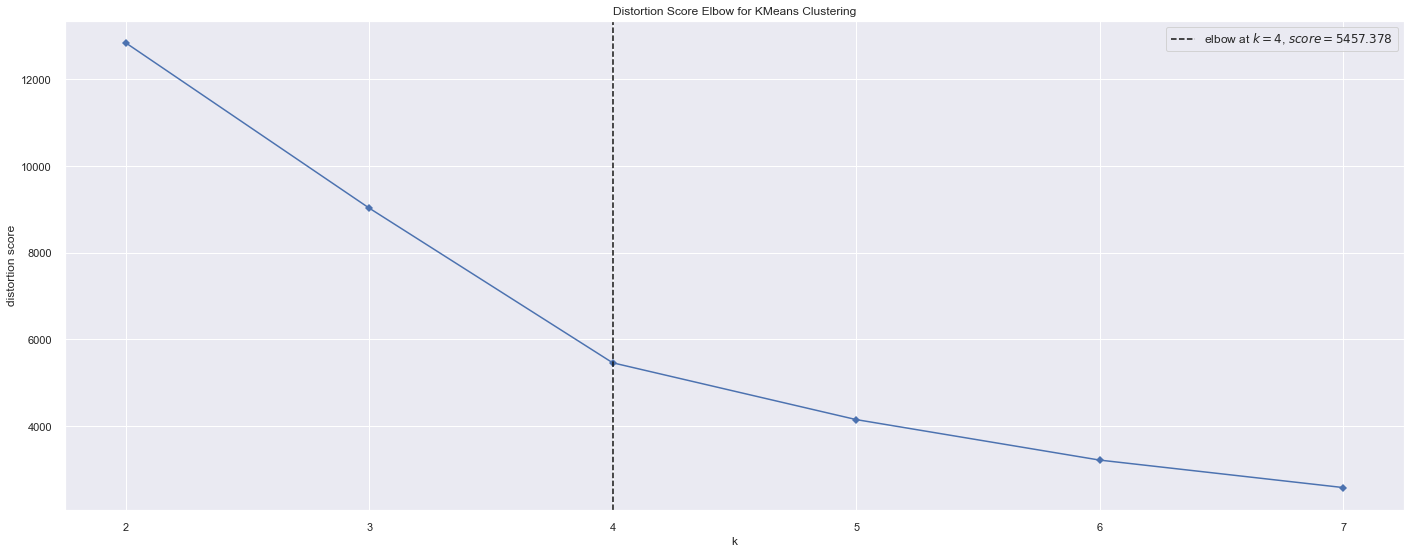

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [49]:
from yellowbrick.cluster import KElbowVisualizer

kmeans = KElbowVisualizer( c.KMeans(), k=clusters, timings=False )
kmeans.fit( X )
kmeans.show()

## 7.2. Silhouette Score

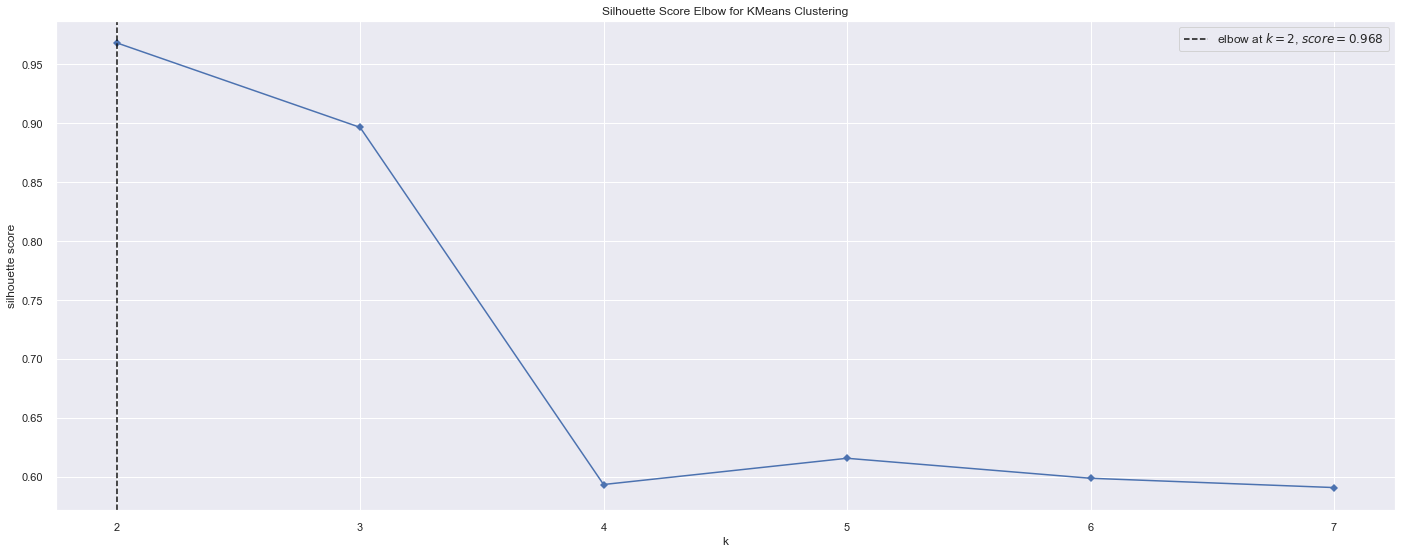

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [57]:
kmeans = KElbowVisualizer( c.KMeans(), k=clusters, metric='silhouette', timings=False )
kmeans.fit( X )
kmeans.show()


## 7.3. Silhouette Analysis

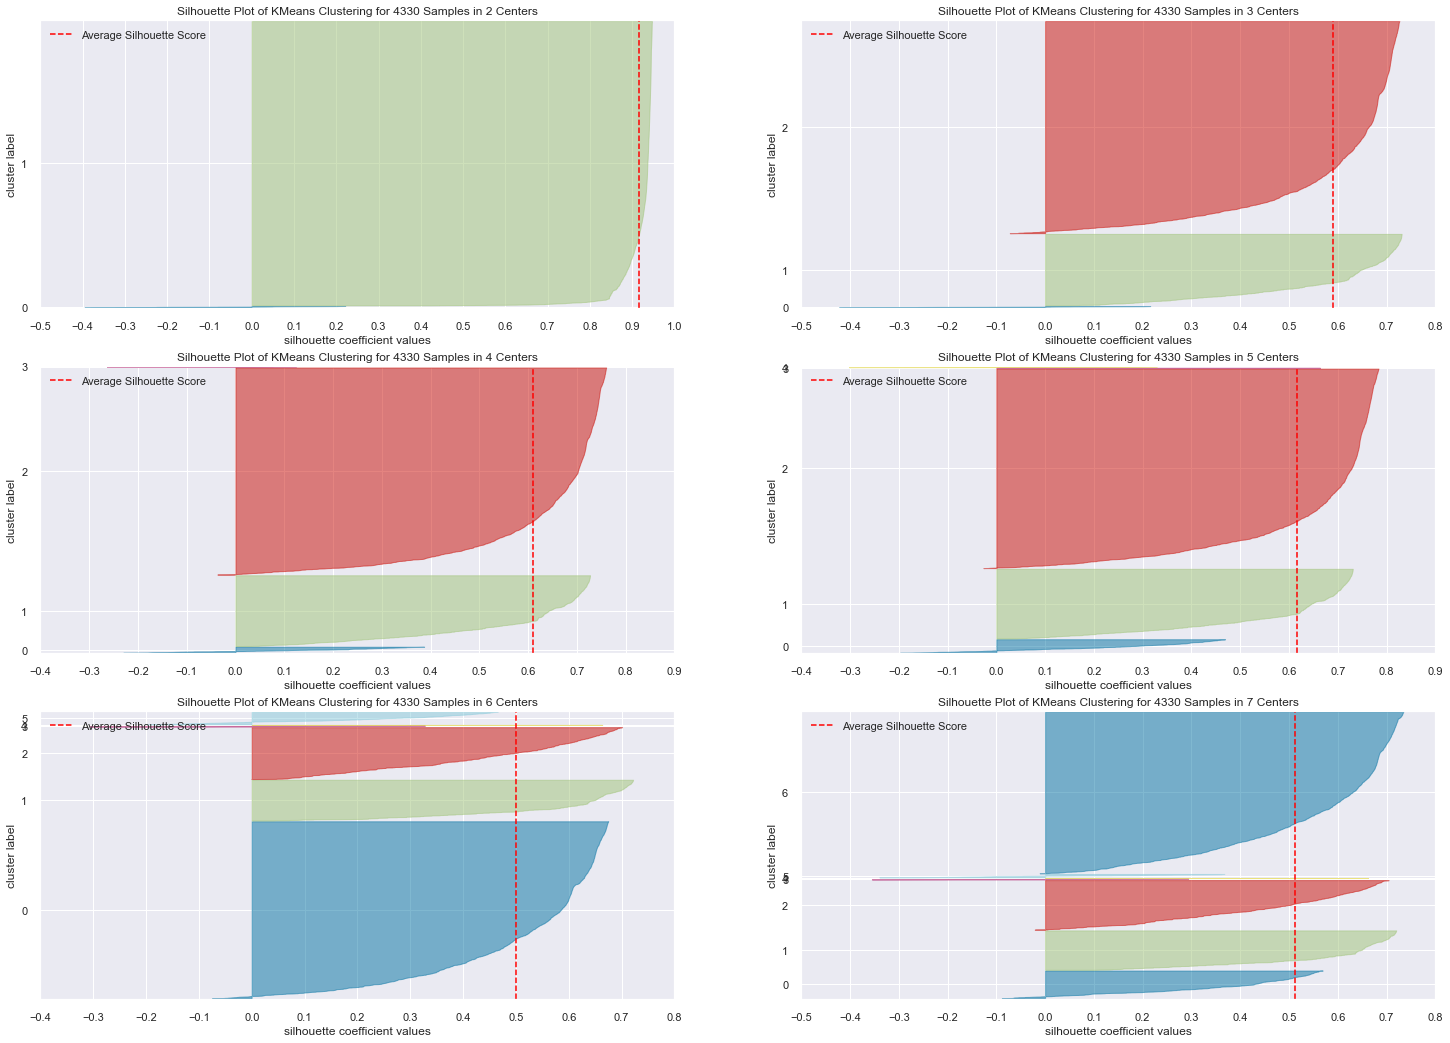

In [58]:
fig, ax = plt.subplots( 3, 2, figsize=(25, 18) )

for k in clusters:
    km = c.KMeans( n_clusters=k, init='random', n_init=10, max_iter=100, random_state=42 )
    q, mod = divmod( k, 2 )
    
    visualizer = SilhouetteVisualizer( km, colors='yellowbrick', ax=ax[q-1][mod] )
    visualizer.fit( X )
    visualizer.finalize()

# <font color=red> 8.0. Model Training <font/>

## 8.1. K-Means

In [59]:
# model definition
k = 3
kmeans = c.KMeans( init='random', n_clusters=k, n_init=10, max_iter=300 )

# model training
kmeans.fit( X )

# clustering
labels = kmeans.labels_

## 8.2.Cluster Validation

In [63]:
## WSS ( Within-cluster sum of square)
print( 'WSS value: {}'.format( kmeans.inertia_ ) )

## SS ( Silhouette Score )
print( 'SS value: {}'.format( m.silhouette_score( X, labels, metric='euclidean' ) ) )

WSS value: 9404.844768603276
SS value: 0.5895273303328358


# <font color=red> 9.0. Cluster Analysis <font/>

In [64]:
df9 = df6.copy()
df9['cluster'] = labels
df9.head()

,customer_id,gross_revenue,recency_days,invoice_no,avg_ticket,cluster
0,17850,0.377179,2.791504,3.889207,-0.033935,0
1,13047,0.135378,-0.360996,0.620902,-0.033423,2
2,12583,0.524388,-0.899714,1.405296,-0.026618,2
3,13748,-0.120506,0.028079,0.097974,-0.023240,2
4,15100,-0.128600,2.402430,-0.163491,0.152447,0


## 9.1.Visualization Inspection

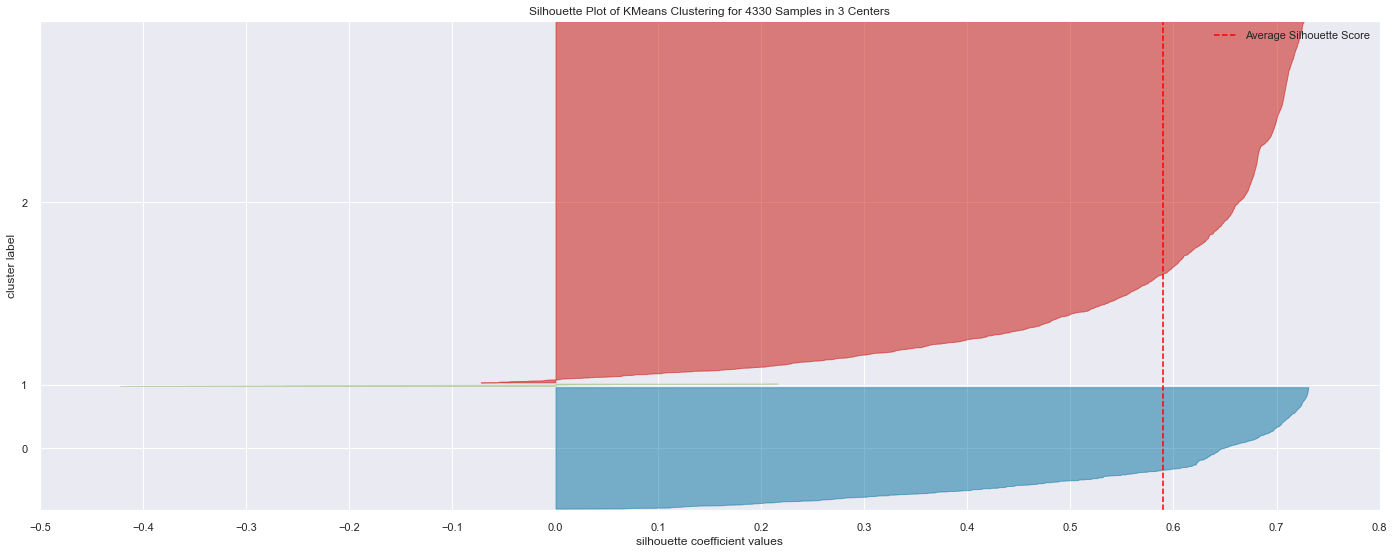

In [65]:
visualizer = SilhouetteVisualizer( kmeans, colors='yellowbrick' )
visualizer.fit( X )
visualizer.finalize()

## 9.2. 2d plot

## 9.3.UMAP

<AxesSubplot:xlabel='embedding_x', ylabel='embedding_y'>

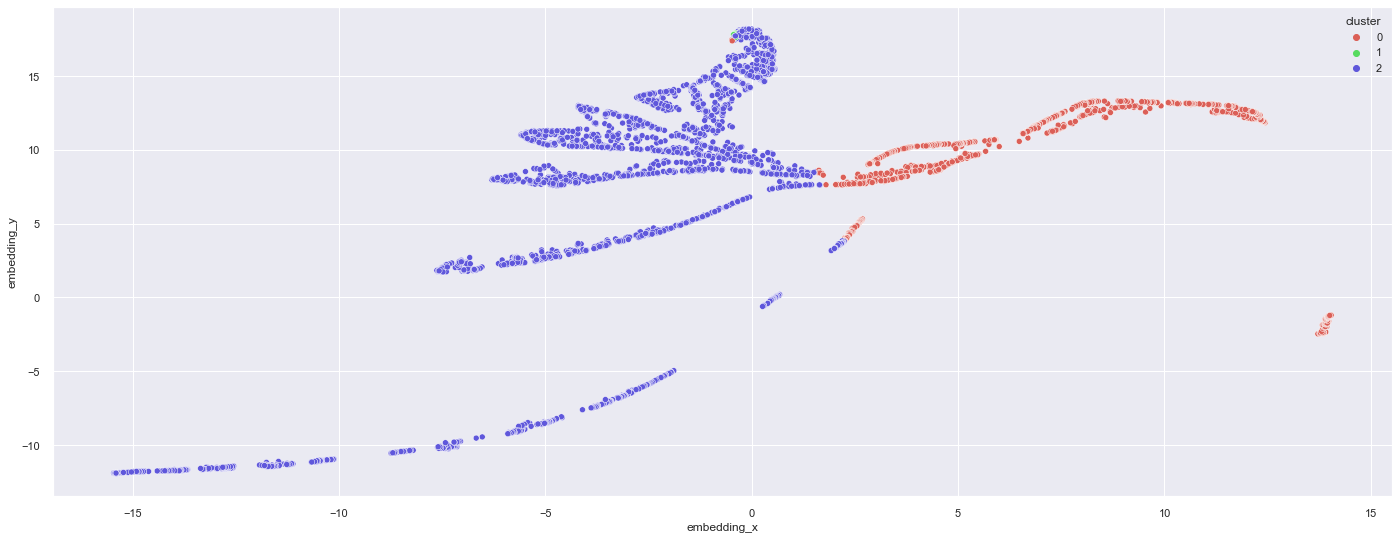

In [66]:
df_viz = df9.drop( columns='customer_id', axis=1 )
reducer = umap.UMAP( n_neighbors=80, random_state=42 )
embedding = reducer.fit_transform( X )

# embedding
df_viz['embedding_x'] = embedding[:, 0]
df_viz['embedding_y'] = embedding[:, 1]

# plot UMAP
sns.scatterplot( x='embedding_x', y='embedding_y', 
                 hue='cluster', 
                 palette=sns.color_palette( 'hls', n_colors=len( df_viz['cluster'].unique() ) ),
                 data=df_viz )

## 9.4.Cluster Profile

In [26]:
df9.head()

,customer_id,gross_revenue,recency_days,invoice_no,avg_ticket,cluster
0,17850,5288.63,302,35,16.950737,2
1,13047,3079.10,31,18,15.709694,3
2,12583,7187.34,2,18,28.634821,2
3,13748,948.25,95,5,33.866071,3
4,15100,635.10,330,6,105.850000,3


In [33]:
#Number of customer
df_cluster = df9[['customer_id','cluster']].groupby('cluster').count().reset_index()
df_cluster['perc_customer'] = 100*(df_cluster['customer_id']/df_cluster['customer_id'].sum())

#Average Gross Revenue
df_avg_gross_revenue = df9[['gross_revenue','cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster,df_avg_gross_revenue, how='inner', on='cluster')

#Average recency_days
df_avg_recency_days = df9[['recency_days','cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster,df_avg_recency_days, how='inner', on='cluster')

#Average invoice_no
df_avg_invoice_no = df9[['invoice_no','cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_invoice_no, how='inner', on='cluster')

# Avg Ticket
df_ticket = df9[['avg_ticket', 'cluster']].groupby( 'cluster' ).mean().reset_index()
df_cluster = pd.merge( df_cluster, df_ticket, how='inner', on='cluster' )

df_cluster.head()


,cluster,customer_id,perc_customer,gross_revenue,recency_days,invoice_no,avg_ticket
0,0,28,0.640439,42614.387143,6.178571,57.821429,162.862605
1,1,6,0.137237,182181.981667,7.166667,89.000000,253.626345
2,2,267,6.107045,8089.028652,20.280899,19.528090,62.783157
3,3,4071,93.115279,946.696250,96.969295,3.641120,25.359654


### Cluster 01: Candidato a Insider

- Número de customers: 6 (0.14% do customers )
- Recência em média: 7 dias
- Compras em média: 89 compras
- Receita em média: $182.182,00 dólares

### Cluster 02: 

- Número de customers: 31 (0.71% do customers )
- Recência em média: 14 dias
- Compras em média: 53 compras
- Receita em média: $40.543,52 dólares

### Cluster 03: 

- Número de customers: 4.335 (99% do customers )
- Recência em média: 92 dias
- Compras em média: 5 compras
- Receita em média: $1.372,57 dólares